# **Netflex movies EDA**
- This research aims to derive insights from Netflix movie data and study several qualitative factors and their impact on movie success.
- The success of a movie is determined by its IMDB rating.
- Data source : https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [64]:
#importing packages & liberaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
# importing data
df = pd.read_csv('titles.csv')
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [66]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [67]:
df_rated=df[df['imdb_score'].notna()]
df_rated.isna().sum()

id                         0
title                      0
type                       0
description                5
release_year               0
age_certification       2285
runtime                    0
genres                     0
production_countries       0
seasons                 3407
imdb_id                    0
imdb_score                 0
imdb_votes                16
tmdb_popularity           84
tmdb_score               228
dtype: int64

In [68]:
df_rated['type'].value_counts()

MOVIE    3407
SHOW     1876
Name: type, dtype: int64

we are only interested in movies, so we slice SHOW type out

In [69]:
df_movies = df_rated[df_rated['type'] == 'MOVIE']
df_movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5


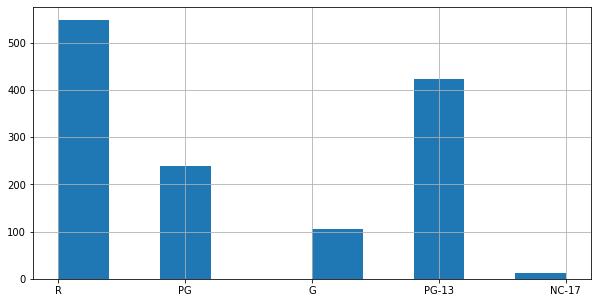

In [70]:
# distribution of movies thoughout age range
 
df_movies['age_certification'].hist(figsize=(10, 5));

In [71]:
df_movies['genres'].unique()

array(["['crime', 'drama']", "['comedy', 'fantasy']", "['comedy']", ...,
       "['fantasy', 'family', 'animation', 'comedy']",
       "['scifi', 'drama']",
       "['crime', 'comedy', 'drama', 'thriller', 'action']"], dtype=object)

In [72]:
#converting genre fields from string to list type

import ast
listed = df_movies['genres'].apply(lambda x:ast.literal_eval(x))


In [73]:
df_movies['genres'] = listed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
# extracting genres

genres = []
for gs in df_movies['genres']:
  for g in gs:
    genres.append(g)
unique_genres = set(genres)
#unique_genres

In [12]:

unique_genres_count = {}
for x in unique_genres:
  unique_genres_count[x]=len([y for y in df_movies['genres'] if x in y])
unique_genres_count

names = list(unique_genres_count.keys())
values = list(unique_genres_count.values())

ax=sns.barplot(names, values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

{'action': 625,
 'animation': 234,
 'comedy': 1454,
 'crime': 516,
 'documentation': 513,
 'drama': 1792,
 'european': 340,
 'family': 317,
 'fantasy': 307,
 'history': 137,
 'horror': 251,
 'music': 157,
 'reality': 9,
 'romance': 678,
 'scifi': 207,
 'sport': 110,
 'thriller': 793,
 'war': 92,
 'western': 30}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


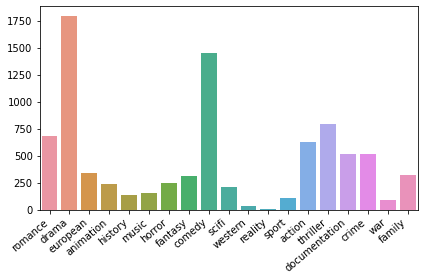

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


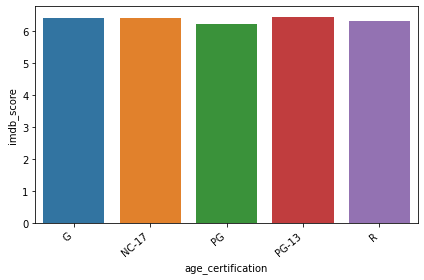

In [43]:
df_age=df_movies[['age_certification','imdb_score']].groupby("age_certification").mean()
ax=sns.barplot(df_age.index, df_age['imdb_score'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


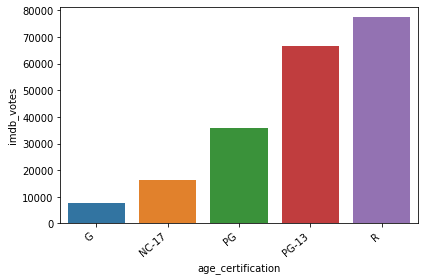

In [45]:
df_age=df_movies[['age_certification','imdb_votes']].groupby("age_certification").mean()
ax=sns.barplot(df_age.index, df_age['imdb_votes'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

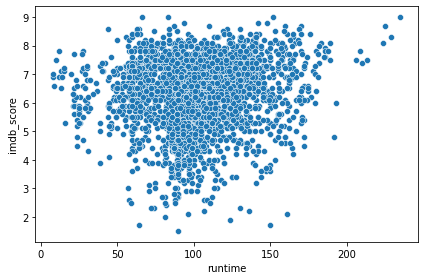

In [24]:
ax=sns.scatterplot(x=df_movies['runtime'],y=df_movies['imdb_score'])
plt.tight_layout();

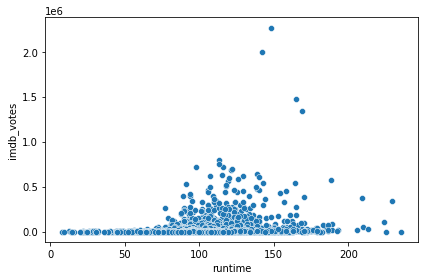

In [46]:
ax=sns.scatterplot(x=df_movies['runtime'],y=df_movies['imdb_votes'])
plt.tight_layout();

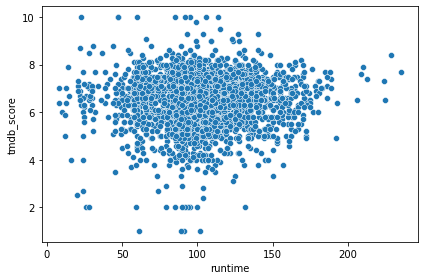

In [21]:
ax=sns.scatterplot(x=df_movies['runtime'],y=df_movies['tmdb_score'])
plt.tight_layout();

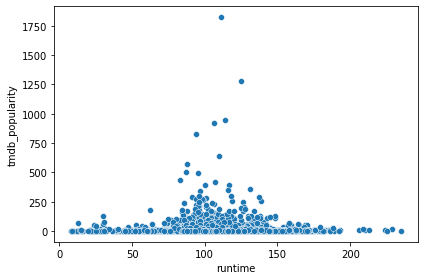

In [22]:
ax=sns.scatterplot(x=df_movies['runtime'],y=df_movies['tmdb_popularity'])
plt.tight_layout();

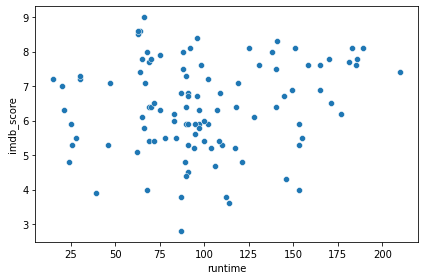

In [25]:
df_g = df_movies[df_movies['age_certification'] == 'G']
ax=sns.scatterplot(x=df_g['runtime'],y=df_g['imdb_score'])
plt.tight_layout();


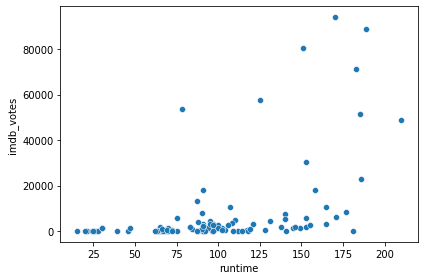

In [47]:
df_g = df_movies[df_movies['age_certification'] == 'G']
ax=sns.scatterplot(x=df_g['runtime'],y=df_g['imdb_votes'])
plt.tight_layout();

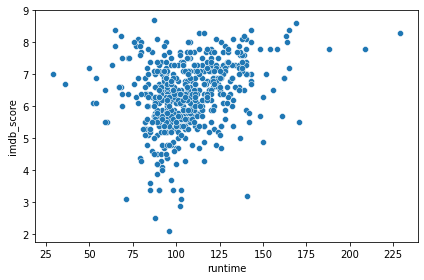

In [26]:
df_r = df_movies[df_movies['age_certification'] == 'R']
ax=sns.scatterplot(x=df_r['runtime'],y=df_r['imdb_score'])
plt.tight_layout();

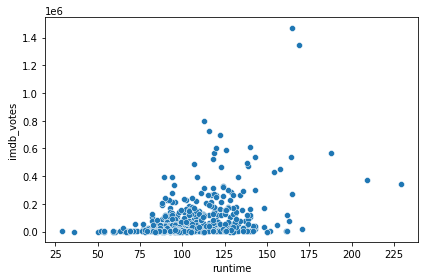

In [48]:
df_r = df_movies[df_movies['age_certification'] == 'R']
ax=sns.scatterplot(x=df_r['runtime'],y=df_r['imdb_votes'])
plt.tight_layout();

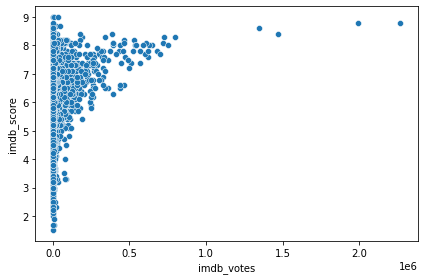

In [50]:
ax=sns.scatterplot(y=df_movies['imdb_score'],x=df_movies['imdb_votes'])
plt.tight_layout();

In [55]:
df_movies[['title','genres','release_year', 'imdb_score','imdb_votes']][df_movies['imdb_votes']== df_movies['imdb_votes'].max()]

,title,genres,release_year,imdb_score,imdb_votes
260,Inception,"[scifi, music, thriller, action]",2010,8.8,2268288.0


In [56]:
less_pop = df_movies[df_movies['imdb_votes'] < 1000000]

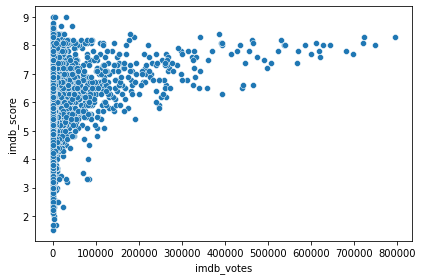

In [57]:
ax=sns.scatterplot(y=less_pop['imdb_score'],x=less_pop['imdb_votes'])
plt.tight_layout();

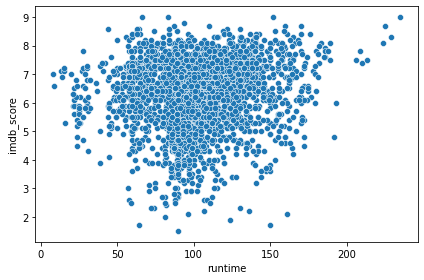

In [59]:
ax=sns.scatterplot(x=less_pop['runtime'],y=less_pop['imdb_score'])
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


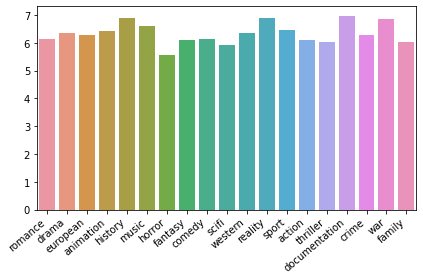

In [32]:
from statistics import mean
unique_genres_imdb = {}
for x in unique_genres:
  unique_genres_imdb[x]=mean([df_movies['imdb_score'].iloc[i] for i in range(len(df_movies['imdb_score'])) if x in df_movies['genres'].iloc[i]])

names = list(unique_genres_imdb.keys())
values = list(unique_genres_imdb.values())

import seaborn as sns

ax=sns.barplot(names, values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


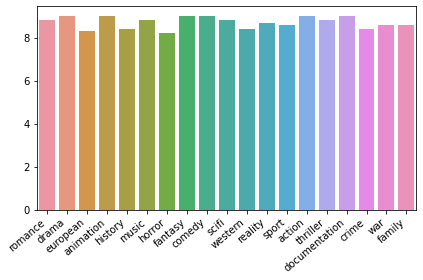

In [33]:
# from statistics import mean
unique_genres_imdb = {}
for x in unique_genres:
  unique_genres_imdb[x]=max([df_movies['imdb_score'].iloc[i] for i in range(len(df_movies['imdb_score'])) if x in df_movies['genres'].iloc[i]])

names = list(unique_genres_imdb.keys())
values = list(unique_genres_imdb.values())

ax=sns.barplot(names, values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


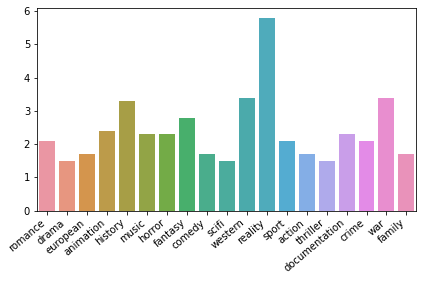

In [34]:
# from statistics import mean
unique_genres_imdb = {}
for x in unique_genres:
  unique_genres_imdb[x]=min([df_movies['imdb_score'].iloc[i] for i in range(len(df_movies['imdb_score'])) if x in df_movies['genres'].iloc[i]])

names = list(unique_genres_imdb.keys())
values = list(unique_genres_imdb.values())

ax=sns.barplot(names, values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


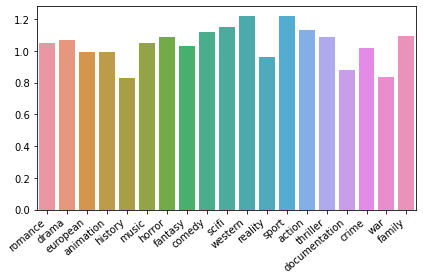

In [35]:
from statistics import stdev
unique_genres_imdb = {}
for x in unique_genres:
  unique_genres_imdb[x]=stdev([df_movies['imdb_score'].iloc[i] for i in range(len(df_movies['imdb_score'])) if x in df_movies['genres'].iloc[i]])

names = list(unique_genres_imdb.keys())
values = list(unique_genres_imdb.values())

ax=sns.barplot(names, values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout();

In [37]:
df_movies[['title','genres','release_year', 'imdb_score']][df_movies['imdb_score']== df_movies['imdb_score'].max()]

,title,genres,release_year,imdb_score
25,No Longer Kids,"[comedy, drama]",1979,9.0
876,Chhota Bheem & Krishna in Mayanagari,"[animation, action, fantasy]",2011,9.0
2814,C/o Kancharapalem,[drama],2018,9.0
3352,David Attenborough: A Life on Our Planet,[documentation],2020,9.0


In [38]:
df_movies[['title','genres','release_year', 'imdb_score']][df_movies['imdb_score'] >= 8]

,title,genres,release_year,imdb_score
1,Taxi Driver,"[crime, drama]",1976,8.3
2,Monty Python and the Holy Grail,"[comedy, fantasy]",1975,8.2
3,Life of Brian,[comedy],1979,8.0
4,The Exorcist,[horror],1973,8.1
13,Richard Pryor: Live in Concert,"[comedy, documentation]",1979,8.1
...,...,...,...,...
5177,Minnal Murali,"[action, comedy, drama, fantasy, scifi]",2021,8.1
5512,In Our Mothers' Gardens,[documentation],2021,8.6
5544,Love is Color Blind,"[romance, comedy]",2021,8.3
5653,Cinema Bandi,"[comedy, drama]",2021,8.0


# Insights:

1- Most movies in this dataset belong to the drama and Comedy genres [30% to the drama and 25% to the Comedy of all movies]. <br>
2- when a move get higher number of votes it's scores higher scores in imdb. <br>
3- movies with average runtime are more popular.<br>
4- reality movies can not go bellow 5.5 in imdb score. <br>
5- on average hirror movies scores the worst result of 5.4 in imdb, while hystory, documentary, reality and war scores the best results between 6.6 and 6.9. <br>